In [2]:
import samplemaker.layout as smlay
import samplemaker.makers as sm
from samplemaker.viewers import GeomView




ModuleNotFoundError: No module named 'plotly_viewers'

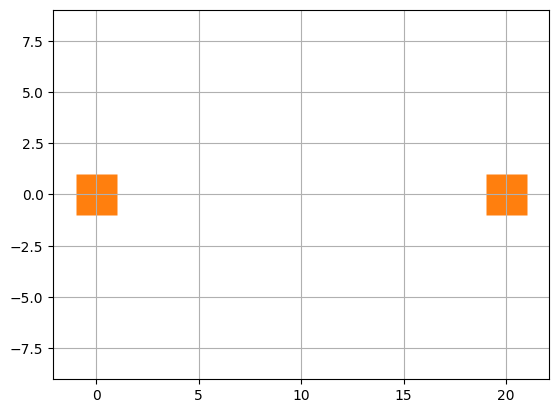

In [3]:
mask = smlay.Mask("00_test_mask")

re0 = sm.make_rect(x0 = 0, y0 = 0, width = 2, height = 2, layer = 1)
re0+= re0.copy().translate(20,0)
GeomView(re0)


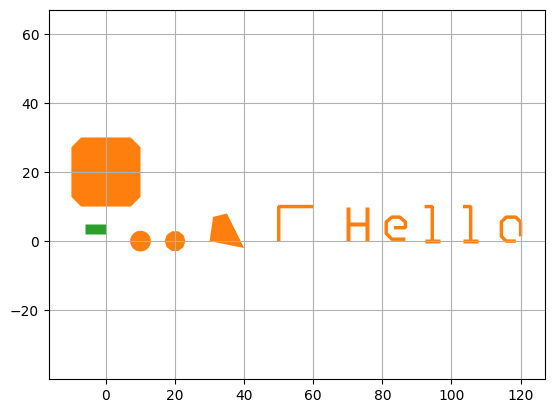

In [18]:
geomE = sm.make_rect(0, 2, 6, 3, numkey=3, layer = 2)
geomE += sm.make_circle(10, 0, 3)
geomE += sm.make_circle(20, 0, 3, layer=1, to_poly=True, vertices=10)

geomE+=(sm.make_poly([30,40,35,31], [0,-2,8,7]))
geomE += sm.make_path([50,50,60],[0 ,10,10],1,to_poly=True)

geomE += sm.make_text(70, 0 , "Hello", 10, 1, numkey = 1, to_poly = True,)

geomE += sm.make_rounded_rect(0, 20, 20, 20, 5, resolution = 2)
GeomView(geomE)

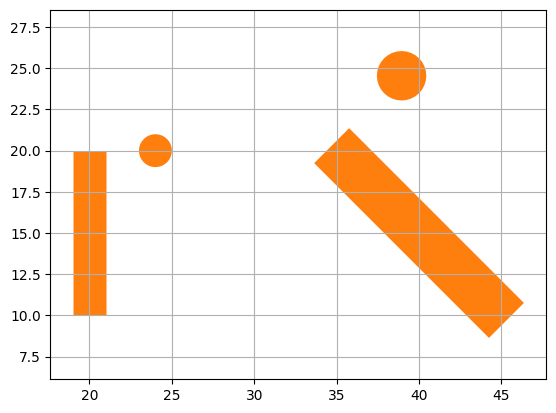

In [31]:
import samplemaker.layout as smlay
import samplemaker.makers as sm
from samplemaker.viewers import GeomView


mask = smlay.Mask("00_test_mask")

base = sm.make_rect(0, 0, 2, 10, layer = 1)
base += sm.make_circle(4,5,1, to_poly = True)
mask.addCell("BCELL", base)


geomB = sm.make_sref(20, 15, "BCELL", base, mag=1.0, angle =0, mirror=False)
geomB += sm.make_sref(40, 15, "BCELL", base, mag=1.5, angle =45, mirror=False)
geomC = geomB.flatten()
b2 = sm.make_rounded_rect(0,0,7,3,1)
b2+= sm.make_sref(40,15, "BCELL", base)
GeomView(geomC)

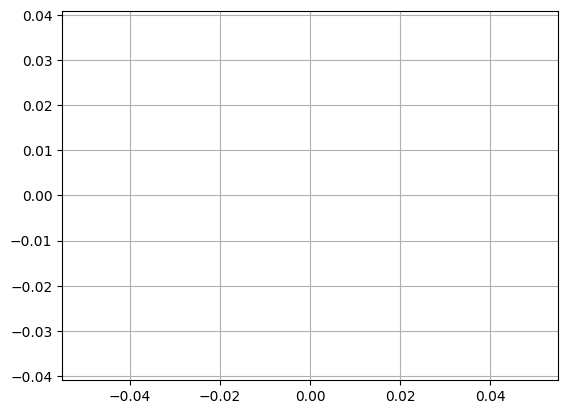

In [27]:
# Create a simple mask layout
themask = smlay.Mask("02_Tutorial_CellReferences")

# Let's draw a simple shape
base = sm.make_rect(0,0,2,10)
base += sm.make_circle(4,5,1,to_poly=True)

# We would like to make identical copies of this.
# Instead of using base.copy() which duplicates the memory and GDS file size
# we can place base in a GDS CELL and refer to it in our main cell

# Create a new GDS cell called "BCELL"
themask.addCell("BCELL", base)

# Now create a single reference to it 
geomE = sm.make_sref(20, 15, "BCELL", base,mag=1.0,angle=0,mirror=False)
# Note that we can move, rotate, scale and mirror the reference 

# Let's create another instance but scaledby 50%  and rotated by 45 degrees
geomE += sm.make_sref(40, 15, "BCELL", base,mag=1.5,angle=45,mirror=False)

GeomView(geomE)

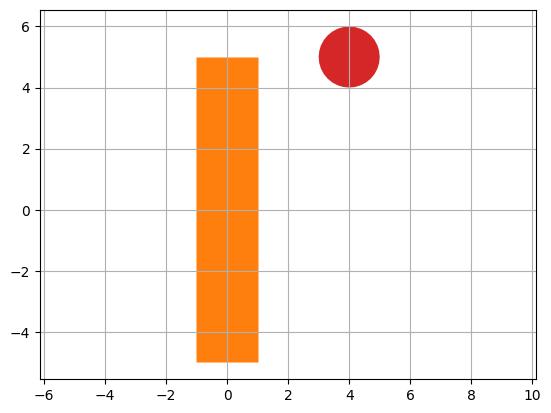

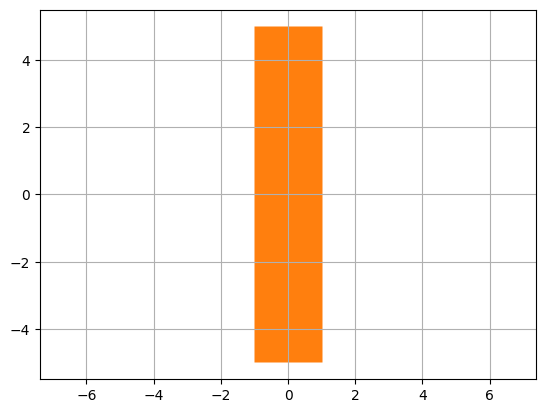

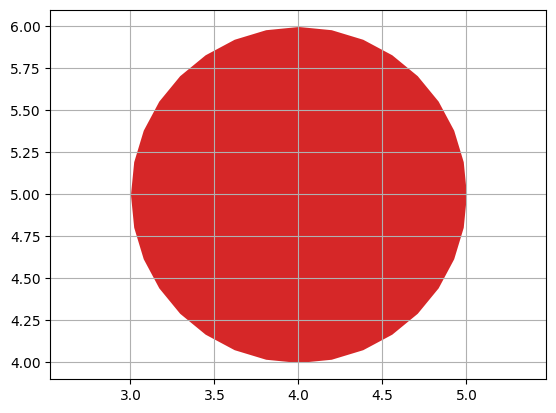

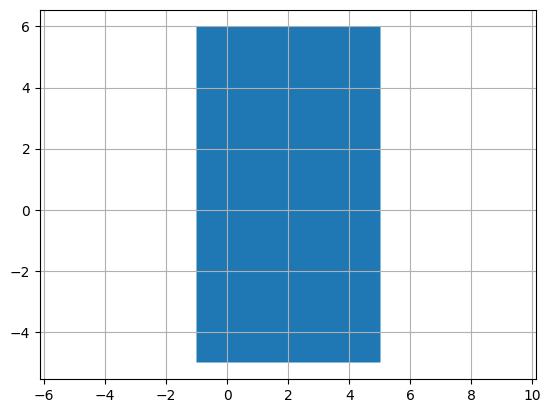

In [38]:
mask =  smlay.Mask("03_test_mask")

base = sm.make_rect(0,0,2,10)
base += sm.make_circle(4,5,1,to_poly=True, layer= 3)
GeomView(base)
geomE = sm.GeomGroup()

gsel1 = base.select_layer(1)
gsel2 = base.deselect_layers([1])
GeomView(gsel1)
GeomView(gsel2)

bb = base.bounding_box()
rbox = bb.toRect()
GeomView(rbox)

geomE += base

res1 = base.copy()
res1.set_layer(2)
res1